---

![](https://ci3.googleusercontent.com/meips/ADKq_NalPsTE2pvOYWNLuTx5FQEiqMR2IICqwbE0yd07Lo5DBqNSujrNfI0xeljnYJEChVIFRqOWdClXUnsfUcUCm1Yrdz0t8BSxBTJ5h_V81xXqZVaqBPFHbfeSCOfVVm-Ti6Ip97bEaRmY7VQ4uEa--AnbpHKzgP0LNNc69HJnzQT1YigtFjsIRkNyXNXscnsPuWMxfVHTVSUshI1Tqjimq5Glw3mN0JUf0G3dtb0LUw=s0-d-e1-ft#https://empresas.alura.com.br/hs-fs/hubfs/488ef98e-4d3a-4c98-9ad4-70c297d9511a.png?width=536&upscale=true&name=488ef98e-4d3a-4c98-9ad4-70c297d9511a.pngraw=true)
   

Por **Luiz Henrique Leite dos Santos**

#  #7DaysOfCode - Ciência de Dados 6/7: 👩🏽‍💻 Teste A/B e Testes de Hipótese

Validar se a versão nova do site (com o sistema de recomendação) é melhor que a antiga.
   
---

## Importando Bibliotecas

In [17]:
import pandas as pd
import seaborn as sns 
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ab_data.csv')

In [3]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [ ]:
"""
Célula gerada pelo Data Wrangler.
"""
def clean_data(df):
    # Remover linhas duplicadas na coluna: 'user_id'
    df = df.drop_duplicates(subset=['user_id'])
    return df

df_clean = clean_data(df.copy())
df_clean.head()

In [4]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [5]:
df.groupby(['group']).converted.mean()*100.00

group
control      12.039918
treatment    11.891958
Name: converted, dtype: float64

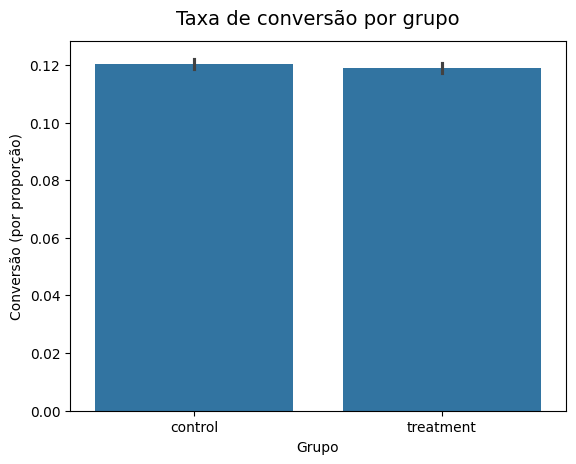

In [8]:
ax = sns.barplot(x = 'group',y ='converted',data = df, orient = 'v')
plt.title('Taxa de conversão por grupo', pad=12, fontsize=14)
ax.set(ylabel = 'Conversão (por proporção)', xlabel = 'Grupo')
plt.show()

In [9]:
controle = df[df.group == 'control'].converted
tratamento = df[df.group == 'treatment'].converted

In [12]:
controle.head()

0    0
1    0
4    1
5    0
7    0
Name: converted, dtype: int64

In [13]:
tratamento.head() 

2    0
3    0
6    1
8    1
9    1
Name: converted, dtype: int64

In [15]:
amostra = [controle.count(), tratamento.count()]
sucesso = [tratamento.sum(), controle.sum()]

In [19]:
z_stat, pval = proportions_ztest(
    sucesso, nobs=amostra
)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(sucesso, nobs=amostra, alpha=0.05)


In [20]:
print(f'Taxa de conversão para o grupo de controle: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'Taxa de conversão para o grupo de tratamento: [{lower_treat:.3f}, {upper_treat:.3f}]')

Taxa de conversão para o grupo de controle: [0.117, 0.121]
Taxa de conversão para o grupo de tratamento: [0.119, 0.122]


**Não existem dados suficientes para afirmar que houve alterações significativas na taxa de conversão. Portanto, concluímos que não há justificativa para substituir a versão atual.**